# MyAnimeList Data

**Group partners' names:**

- Soumeng Chea
- Fay Feghali
- Erina Kitamura
- Kristine Umeh

## Task Complete:

Below are the list that as a group have completed so far since the project proposal was due.

- Data pre-processing: Completed
- Linear Regression: Completed
- K-nearest neighbors: Completed
- Squares and Cosine Similarity w/ KNN: Almost complete
- K-Mean Cluster w/ PCs: Almost Complete

## To-Do List: From now until the 18th:

- Apriori
- Analyze Results
- Work on PowerPoint
- Prep for Video presentation
- Project report writeup

## **Below are the works that we have done so far**

## Data Pre-Processing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from statistics import mean
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.core.common import SettingWithCopyWarning
import warnings

/Users/kristineumeh/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
data = './datasets/anime_data.csv'
# data = '/Users/kristineumeh/Desktop/GradSchool/DataMining/AnimeProject/archive/anime_data.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


### Extracting studio sequences into a new columns

Source: https://stackoverflow.com/questions/71432733/pandas-extracting-a-phrase-in-a-dict-column?noredirect=1#comment126259925_71432733

In case of the items in the column is just string, convert the column into actual object

In [5]:
df['studios'] = df['studios'].apply(ast.literal_eval)

Implementing .str to access indexes/keys from the lists/dicts of items in a column, and use a combination of pipe and where to fallback to the original values where the result from .str to returns NaN

In [6]:
df['studios'] = df['studios'].str[0].str['name'].pipe(lambda x: x.where(x.notna(), df['studios']))
df.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,Hal Film Maker,"Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,Toei Animation,It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,Palm Studio,This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


### Extract genre list into an individual row

In [7]:
df['genres'].head(5)

0    ['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...
1    ['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...
2    ['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...
3           ['Comedy', 'Dementia', 'Horror', 'Seinen']
4           ['Action', 'Adventure', 'Mecha', 'Sci-Fi']
Name: genres, dtype: object

**Convert the values in the genres column to actual list, because it might just look like a list but actually be a string.**

In [8]:
df['genres'] = df['genres'].apply(ast.literal_eval)

**Implementing .explode() for genres column**

In [9]:
data = df.explode('genres').reset_index(drop = True)

In [10]:
data.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Action,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Adventure,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
2,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Comedy,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
3,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Drama,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
4,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Sci-Fi,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV


### Data Information + Rows and Columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35984 entries, 0 to 35983
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         35984 non-null  int64  
 1   aired_from     35977 non-null  object 
 2   aired_to       20657 non-null  object 
 3   duration       35984 non-null  object 
 4   episodes       35984 non-null  int64  
 5   genres         35969 non-null  object 
 6   popularity     35984 non-null  int64  
 7   premiered      13621 non-null  object 
 8   rank           33954 non-null  float64
 9   rating         35984 non-null  object 
 10  score          35984 non-null  float64
 11  scored_by      35984 non-null  int64  
 12  source         35984 non-null  object 
 13  status         35984 non-null  object 
 14  studios        35984 non-null  object 
 15  synopsis       35465 non-null  object 
 16  title          35984 non-null  object 
 17  title_english  19120 non-null  object 
 18  type  

In [12]:
data.shape

(35984, 19)

### Looking for missing value within the dataset

In [13]:
data.isnull().sum()

mal_id               0
aired_from           7
aired_to         15327
duration             0
episodes             0
genres              15
popularity           0
premiered        22363
rank              2030
rating               0
score                0
scored_by            0
source               0
status               0
studios              0
synopsis           519
title                0
title_english    16864
type                 0
dtype: int64

### Extracting Season and Year from primier column to create two new columns

In [14]:
data[['premiered_season', 'premiered_year']] = data['premiered'].str.split(expand = True)

In [15]:
data.head(5)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,...,scored_by,source,status,studios,synopsis,title,title_english,type,premiered_season,premiered_year
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Action,38,Spring 1998,27.0,R - 17+ (violence & profanity),...,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
1,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Adventure,38,Spring 1998,27.0,R - 17+ (violence & profanity),...,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
2,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Comedy,38,Spring 1998,27.0,R - 17+ (violence & profanity),...,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
3,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Drama,38,Spring 1998,27.0,R - 17+ (violence & profanity),...,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
4,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,Sci-Fi,38,Spring 1998,27.0,R - 17+ (violence & profanity),...,544987,Original,Finished Airing,Sunrise,"In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV,Spring,1998


In [16]:
data.columns

Index(['mal_id', 'aired_from', 'aired_to', 'duration', 'episodes', 'genres',
       'popularity', 'premiered', 'rank', 'rating', 'score', 'scored_by',
       'source', 'status', 'studios', 'synopsis', 'title', 'title_english',
       'type', 'premiered_season', 'premiered_year'],
      dtype='object')

### Dropping Columns

In [17]:
data.drop(['mal_id', 'aired_from', 'aired_to', 'synopsis', 'status'], axis = 1, inplace = True)

In [18]:
data.head(5)

,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,studios,title,title_english,type,premiered_season,premiered_year
0,24 min per ep,26,Action,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
1,24 min per ep,26,Adventure,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
2,24 min per ep,26,Comedy,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
3,24 min per ep,26,Drama,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
4,24 min per ep,26,Sci-Fi,38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998


#### Drop primiered column

In [19]:
data.drop(['premiered'], axis = 1, inplace = True)

In [20]:
data.head(5)

,duration,episodes,genres,popularity,rank,rating,score,scored_by,source,studios,title,title_english,type,premiered_season,premiered_year
0,24 min per ep,26,Action,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
1,24 min per ep,26,Adventure,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
2,24 min per ep,26,Comedy,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
3,24 min per ep,26,Drama,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998
4,24 min per ep,26,Sci-Fi,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,Cowboy Bebop,TV,Spring,1998


#### Drop English title column

In [21]:
data.drop(['title_english'], axis = 1, inplace = True)

In [22]:
data.head(5)

,duration,episodes,genres,popularity,rank,rating,score,scored_by,source,studios,title,type,premiered_season,premiered_year
0,24 min per ep,26,Action,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
1,24 min per ep,26,Adventure,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
2,24 min per ep,26,Comedy,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
3,24 min per ep,26,Drama,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
4,24 min per ep,26,Sci-Fi,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998


### Fill NaN with 0 or make the empty column as string

In [23]:
data['rank'] = data['rank'].fillna(data['rank'].dropna().mode().values[0])
data['premiered_year'] = data['premiered_year'].fillna(data['premiered_year'].dropna().mode().values[0])
data['genres'].fillna('', inplace = True)
data['premiered_season'].fillna('', inplace = True)
data.isnull().sum()

duration            0
episodes            0
genres              0
popularity          0
rank                0
rating              0
score               0
scored_by           0
source              0
studios             0
title               0
type                0
premiered_season    0
premiered_year      0
dtype: int64

In [24]:
data.head(3)

,duration,episodes,genres,popularity,rank,rating,score,scored_by,source,studios,title,type,premiered_season,premiered_year
0,24 min per ep,26,Action,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
1,24 min per ep,26,Adventure,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
2,24 min per ep,26,Comedy,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998


### Preprocess User Datat ###

Following are the code used to preprocess the user_score_data.csv and user_favorited_data which are originally derived from user_data.csv. This section was commented out and data was exported into a csv since it takes a while to execute.

In [25]:
# user_df = pd.read_csv('./datasets/user_data.csv')
# user_df.insert(0, 'user_id', range(1, 1 + len(user_df)))
# user_watched = user_df[['user_id', 'watched']]

# import ast
# user_data = []

# for i in range(len(user_df)):
#     row = user_watched.iloc[i].watched
#     row = row.strip('][').split('}, ')
#     for item in row:
#         row_dict = {}
#         if (item[-1] != "}"):
#             item = item + "}"
#         item_dict = ast.literal_eval(item)
#         row_dict['user_id'] = user_watched.iloc[i].user_id
#         row_dict['mal_id'] = item_dict['mal_id']
#         row_dict['rating'] = item_dict['score']
#         user_data.append(row_dict)

# df_user_data = pd.DataFrame(user_data)
# df_user_data.to_csv('user_score_data')

In [26]:
# user_df = pd.read_csv('./datasets/user_data.csv')
# user_df.insert(0, 'user_id', range(1, 1 + len(user_df)))
# user_favorites = user_df[['user_id', 'favorites']]

# import ast
# import re
# user_data = []

# for i in range(len(user_df)):
#     row = user_favorites.iloc[i].favorites
#     row_dict = ast.literal_eval(row)
#     favorites_lst = row_dict['anime']
#     mal_ids = []
#     for item in favorites_lst:
#         before, key, after = row.partition("mal_id': ")
#         mal_ids = re.findall(r'\b\d+\b', after)
#     for mal_id in mal_ids:
#         row_dict = {}
#         row_dict['user_id'] = user_favorites.iloc[i].user_id
#         row_dict['mal_id'] = mal_id
#         row_dict['favorited'] = 1
#         user_data.append(row_dict)

# df_user_favorite_data = pd.DataFrame(user_data)
# df_user_favorite_data.to_csv('user_favorited_data')

In [27]:
user_rating_data_df = pd.read_csv('./datasets/user_score_data.csv', usecols=['user_id', 'mal_id', 'rating'], 
                                  dtype={'user_id':'int32', 'mal_id':'int32', 'rating':'float32'})
user_favorite_data_df = pd.read_csv('./datasets/user_favorited_data.csv', usecols=['user_id', 'mal_id', 'favorited'],
                                   dtype={'user_id':'int32', 'mal_id':'int32', 'rating':'int32'})
user_data_df = user_rating_data_df

In [28]:
user_rate_fave_df = pd.concat([user_rating_data_df, user_favorite_data_df], axis=0)
user_rate_fave_df.favorited = user_rate_fave_df.favorited.fillna(0)

In [29]:
animes_df = pd.read_csv('./datasets/anime_data.csv', usecols=['mal_id', 'title'], 
                        dtype={'mal_id':'int32', 'title':'string'})

### Linear Regression ###

Not all users will rate every anime. Therefore, there are missing data in the ratings of animes. To have a better prediction, linear regression can be used to generate predictions of missing data based on existing values.

In [30]:
def getTestTrainData(y):
    test_data = y[y['rating'].isna()]
    train_data = y.dropna(subset=['rating'])

    y_train = train_data['rating']
    X_train = train_data.drop('rating', axis=1)
    return test_data, train_data, y_train, X_train

In [31]:
def fillMissingRatingDataLinReg(y):
    test_data, train_data, y_train, X_train = getTestTrainData(y)
    lin_model = LinearRegression().fit(X_train, y_train)
    
    X_test = test_data.drop('rating', axis=1)
    # case for no data to predict
    if (len(X_test.index) == 0):
        print("no missing data to replace")
        return y
    
    y_pred = lin_model.predict(X_test)
    
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
        test_data.loc[test_data.rating.isna(), 'rating'] = y_pred

    new = pd.concat([test_data, train_data], axis=0).sort_values(by=['mal_id'], ascending=True)
    new.rename(columns={'rating':'rating'}, inplace=True)
    
    return new

In [32]:
def getComprehensiveUserRating(user_data_df, user_id):
    '''
        Takes user data and fills missing data based on linear regression
        using collaborative anime rating. Predicts what user of specified
        id will rate each anime.
    '''
    # get all user rating
    y = (user_data_df[user_data_df['user_id'] == user_id])
    y = y.drop(columns=['user_id'])
    
    comprehensive_df = fillMissingRatingDataLinReg(y)
    
    return comprehensive_df

Tables below show initial ratings for user with user_id of 3 and its predicted ratings using linear regression.

In [33]:
print("Initial User Data for user_id 10")
old = user_rate_fave_df.loc[user_rate_fave_df.user_id == 10].sort_values(by=['mal_id'], ascending=True).head(5)
old[["mal_id", "rating", "favorited"]]

Initial User Data for user_id 10


,mal_id,rating,favorited
4568,1,9.0,0.0
97,3,NaN,1.0
4569,5,6.0,0.0
5107,6,6.0,0.0
106,11,NaN,1.0


In [34]:
new = getComprehensiveUserRating(user_rate_fave_df, 10)
print("User Data for user_id 10 With Predicted Ratings")
new.head(5)

User Data for user_id 10 With Predicted Ratings


,mal_id,rating,favorited
4568,1,9.000000,0.0
97,3,5.992471,1.0
4569,5,6.000000,0.0
5107,6,6.000000,0.0
106,11,5.992329,1.0


### K-Nearest Neighbors ###

K-nearest neighbors can be used to generate recommendation based on specified anime. Using collaborative filtering, k-nearest neighbors will search for what other animes were enjoyed by other users who also enjoyed watching the specified anime.

In [35]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [36]:
animes_users = user_data_df.pivot(index='mal_id', columns='user_id', values='rating').fillna(0)
animes_users_mat = csr_matrix(animes_users.values)

In [37]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(animes_users_mat)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [38]:
def getRecommendations(movie_title, data_matrix, animes_df, model_knn, n_recommendations):
    model_knn.fit(data_matrix)
    anime_index = process.extractOne(movie_title, animes_df['title'])[2]
    distances, indices = model_knn.kneighbors(data_matrix[anime_index], n_neighbors=n_recommendations)
    for i in indices:
        print(animes_df['title'][i].where(i != anime_index))
    

In [39]:
getRecommendations('Bleach', animes_users_mat, animes_df, model_knn, 5)

3990                                                 <NA>
6198    Iizuka-senpai x Blazer: Ane Kyun! yori The Ani...
5435                              Kanashimi no Belladonna
3093    New Mobile Report Gundam Wing: Frozen Teardrop...
3295                                       Plastic Little
Name: title, dtype: string


### K-Mean CLustering w/ PCA

#### Testing dataset

In [40]:
copy_data = data

In [41]:
copy_data.head()

,duration,episodes,genres,popularity,rank,rating,score,scored_by,source,studios,title,type,premiered_season,premiered_year
0,24 min per ep,26,Action,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
1,24 min per ep,26,Adventure,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
2,24 min per ep,26,Comedy,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
3,24 min per ep,26,Drama,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998
4,24 min per ep,26,Sci-Fi,38,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Sunrise,Cowboy Bebop,TV,Spring,1998


In [42]:
copy_data.drop(['duration', 'genres', 'rating', 'source', 'studios', 'type', 'premiered_season', 'title'], axis = 1, inplace = True)

In [43]:
copy_data.head(3)

,episodes,popularity,rank,score,scored_by,premiered_year
0,26,38,27.0,8.79,544987,1998
1,26,38,27.0,8.79,544987,1998
2,26,38,27.0,8.79,544987,1998


In [44]:
pca = PCA()
pca.fit(copy_data)

PCA()

Text(0, 0.5, 'Explained Variance')

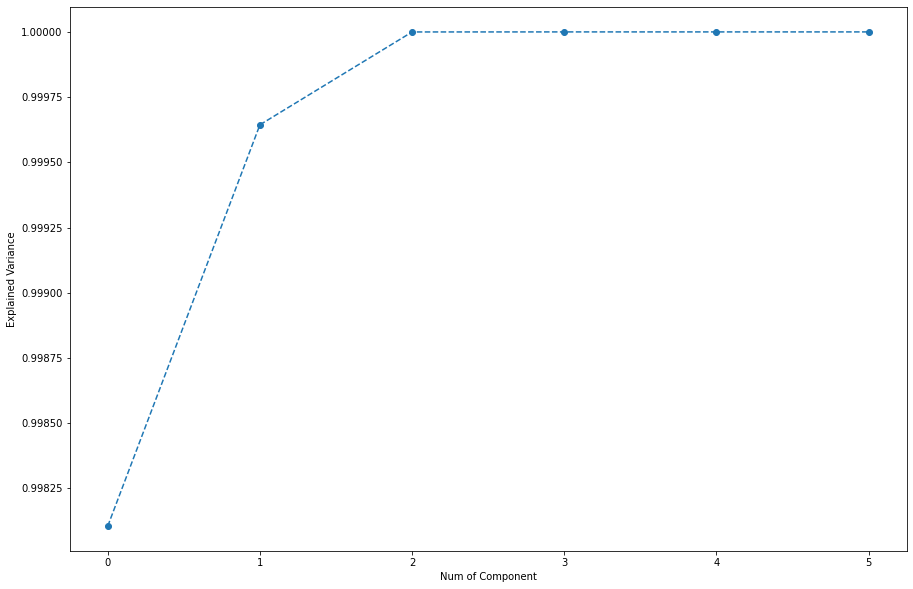

In [45]:
pca.explained_variance_ratio_
plt.figure(figsize = (15, 10))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Num of Component')
plt.ylabel('Explained Variance')

In [46]:
pcs = PCA(n_components = 2)
pca.fit(copy_data)

PCA()

In [47]:
pca.transform(copy_data)

array([[ 5.11544369e+05,  2.92291512e+03, -1.28216085e+03,
        -5.43023240e+00, -1.43926906e+01, -4.88849352e-01],
       [ 5.11544369e+05,  2.92291512e+03, -1.28216085e+03,
        -5.43023240e+00, -1.43926906e+01, -4.88849352e-01],
       [ 5.11544369e+05,  2.92291512e+03, -1.28216085e+03,
        -5.43023240e+00, -1.43926906e+01, -4.88849352e-01],
       ...,
       [-1.22448102e+04, -3.12998707e+03,  6.58169209e+02,
        -1.26516276e+01,  2.44152379e+00,  2.85198061e-02],
       [-1.22448102e+04, -3.12998707e+03,  6.58169209e+02,
        -1.26516276e+01,  2.44152379e+00,  2.85198061e-02],
       [-1.22448102e+04, -3.12998707e+03,  6.58169209e+02,
        -1.26516276e+01,  2.44152379e+00,  2.85198061e-02]])

In [48]:
scores_pca = pca.transform(copy_data)

#### K-Mean clustering with PCA

In [49]:
from sklearn.cluster import KMeans

In [50]:
wcss = []
for i in range(1, 21):
    pca_kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    pca_kmean.fit(scores_pca)
    wcss.append(pca_kmean.inertia_)

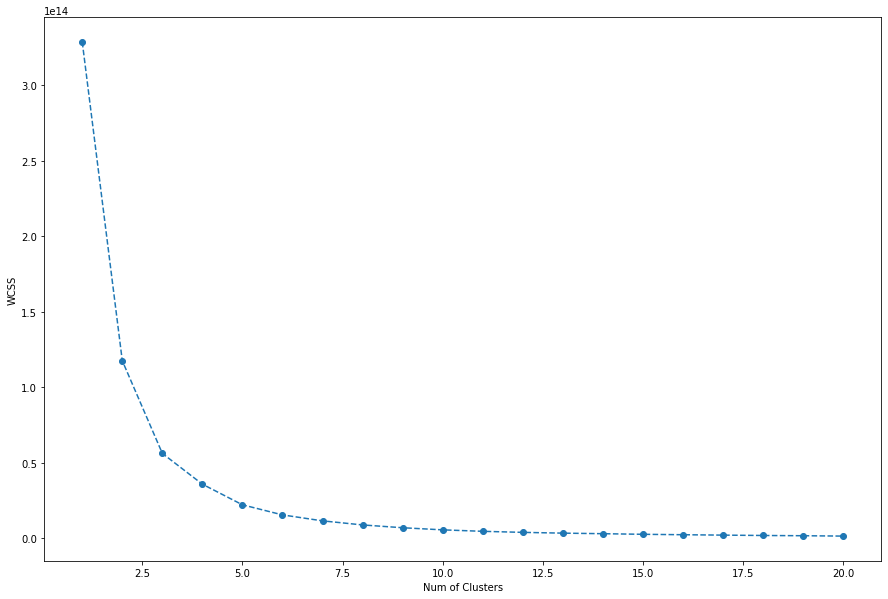

In [51]:
plt.figure(figsize = (15, 10))
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
pca_kmeans = KMeans(n_clusters = 3, init = 'k-mean++', random_state = 50)

In [53]:
# pca_kmeans.fit(scores_pca)

In [54]:
data_kmeans = pd.concat([copy_data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
data_kmeans.head(3)

,episodes,popularity,rank,score,scored_by,premiered_year,0,1,2,3,4,5
0,26,38,27.0,8.79,544987,1998,511544.369229,2922.915125,-1282.16085,-5.430232,-14.392691,-0.488849
1,26,38,27.0,8.79,544987,1998,511544.369229,2922.915125,-1282.16085,-5.430232,-14.392691,-0.488849
2,26,38,27.0,8.79,544987,1998,511544.369229,2922.915125,-1282.16085,-5.430232,-14.392691,-0.488849


### Apriori Algorithm ###

In [55]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [56]:
user_rating_data_df.head(10)

,user_id,mal_id,rating
0,1,29978,6.0
1,1,2467,10.0
2,1,28789,6.0
3,1,34881,6.0
4,1,101,10.0
5,1,713,8.0
6,1,36032,8.0
7,1,656,5.0
8,1,1485,10.0
9,1,17901,6.0


In [57]:
animes_df.head(10)

,mal_id,title
0,1,Cowboy Bebop
1,100,Shin Shirayuki-hime Densetsu Prétear
2,1000,Uchuu Kaizoku Captain Herlock
3,10003,Kago Shintarou Anime Sakuhin Shuu
4,10005,Tetsujin 28-gou: Hakuchuu no Zangetsu
5,1001,Tide-Line Blue: Kyoudai
6,10012,Carnival Phantasm
7,10014,Shouwa Monogatari
8,10015,Yu☆Gi☆Oh! Zexal
9,10016,Kizuna Ichigeki


You can merge the two dataframe on a common column mal_id to obtain the records of user_data_df concatenated with the corresponding details of the movie from the animes_df. 

In [58]:
df = pd.merge(user_data_df, animes_df[['mal_id', 'title']], on='mal_id')
df.tail(20)

,user_id,mal_id,rating,title
931731,2193,3838,8.0,Himitsu no Akko-chan 2
931732,1604,2758,5.0,Shippuu! Iron Leaguer
931733,2092,2758,6.0,Shippuu! Iron Leaguer
931734,2193,2758,5.0,Shippuu! Iron Leaguer
931735,1823,35516,1.0,Dappys
931736,2092,35516,6.0,Dappys
931737,1858,40496,9.0,Maou Gakuin no Futekigousha: Shijou Saikyou no...
931738,1893,28813,6.0,Bamboo Blade: Fanfu-Fufe-Fo
931739,2092,28813,7.0,Bamboo Blade: Fanfu-Fufe-Fo
931740,2116,28813,8.0,Bamboo Blade: Fanfu-Fufe-Fo


In [59]:
df.shape

(931751, 4)

Ensure there are no duplicate records for any given combination of user_id and title

In [60]:
df = df.drop_duplicates(['user_id','title'])

In [61]:
df.tail(20)

,user_id,mal_id,rating,title
931731,2193,3838,8.0,Himitsu no Akko-chan 2
931732,1604,2758,5.0,Shippuu! Iron Leaguer
931733,2092,2758,6.0,Shippuu! Iron Leaguer
931734,2193,2758,5.0,Shippuu! Iron Leaguer
931735,1823,35516,1.0,Dappys
931736,2092,35516,6.0,Dappys
931737,1858,40496,9.0,Maou Gakuin no Futekigousha: Shijou Saikyou no...
931738,1893,28813,6.0,Bamboo Blade: Fanfu-Fufe-Fo
931739,2092,28813,7.0,Bamboo Blade: Fanfu-Fufe-Fo
931740,2116,28813,8.0,Bamboo Blade: Fanfu-Fufe-Fo


Association algorithms need data in a format such that the userId forms the index, the columns are the movie titles and the values can be 1 or 0 depending on whether that user has watched the movie of the corresponding column. The resulting data is like a user's watchlist, for each userId, having 1 in columns of the movies that the user has watched and 0 otherwise.

In [62]:
df_pivot = df.pivot(index='user_id', columns='title', values='rating').fillna(0)

In [63]:
df_pivot.head()

title,"""0""","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Calpis"" Hakkou Monogatari","""Eiji""","""Eiyuu"" Kaitai","""Kiss Dekiru Gyoza"" x Mameshiba Movie","""Parade"" de Satie","""R100"" x Mameshiba Original Manners",...,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,the FLY BanD!,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,9.0,7.0,9.0,9.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [64]:
def encode_ratings(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)

In [65]:
df_pivot.head()

title,"""0""","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Calpis"" Hakkou Monogatari","""Eiji""","""Eiyuu"" Kaitai","""Kiss Dekiru Gyoza"" x Mameshiba Movie","""Parade"" de Satie","""R100"" x Mameshiba Original Manners",...,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,the FLY BanD!,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,ēlDLIVE,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
frequent_items = apriori(df_pivot, min_support=0.4, use_colnames=True)
frequent_items.head()

,support,itemsets
0,0.506150,(Akame ga Kill!)
1,0.609112,(Angel Beats!)
2,0.524374,(Ano Hi Mita Hana no Namae wo Bokutachi wa Mad...
3,0.529385,(Another)
4,0.481549,(Ansatsu Kyoushitsu)


In [67]:
frequent_items_fp = fpgrowth(df_pivot, min_support=0.4, use_colnames=True)
frequent_items_fp.head()

,support,itemsets
0,0.783144,(Shingeki no Kyojin)
1,0.744419,(Boku no Hero Academia)
2,0.739408,(One Punch Man)
3,0.725740,(Kimi no Na wa.)
4,0.722551,(Death Note)


In [68]:
%timeit apriori(df_pivot, min_support=0.4)

1.6 s ± 71.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%timeit fpgrowth(df_pivot, min_support=0.4)

2.3 s ± 68.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Akame ga Kill!),(Boku no Hero Academia),0.506150,0.744419,0.441913,0.873087,1.172844,0.065125,2.013832
1,(Boku no Hero Academia),(Akame ga Kill!),0.744419,0.506150,0.441913,0.593635,1.172844,0.065125,1.215287
2,(Akame ga Kill!),(Boku no Hero Academia 2nd Season),0.506150,0.674715,0.402733,0.795680,1.179282,0.061226,1.592032
3,(Boku no Hero Academia 2nd Season),(Akame ga Kill!),0.674715,0.506150,0.402733,0.596894,1.179282,0.061226,1.225111
4,(Akame ga Kill!),(Death Note),0.506150,0.722551,0.428246,0.846085,1.170968,0.062526,1.802606


Let's sort the result by descending order of lift. So that the most likely movie that the user will watch is recommended first.

In [71]:
result_df = rules.sort_values(by=['lift'], ascending=False)
result_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1141,(Shokugeki no Souma),(Shokugeki no Souma: Ni no Sara),0.482916,0.419590,0.413667,0.856604,2.041526,0.211041,4.047596
1140,(Shokugeki no Souma: Ni no Sara),(Shokugeki no Souma),0.419590,0.482916,0.413667,0.985885,2.041526,0.211041,36.633433
5069,"(Fate/Zero, Shingeki no Kyojin)",(Fate/Zero 2nd Season),0.449203,0.452392,0.411390,0.915822,2.024399,0.208174,6.505322
5072,(Fate/Zero 2nd Season),"(Fate/Zero, Shingeki no Kyojin)",0.452392,0.449203,0.411390,0.909366,2.024399,0.208174,6.077130
1172,(Yahari Ore no Seishun Love Comedy wa Machigat...,(Yahari Ore no Seishun Love Comedy wa Machigat...,0.489294,0.424601,0.418679,0.855680,2.015254,0.210924,3.986956


In [72]:
recomm_df = result_df[result_df['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Death Note')]
recomm_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13554,(Death Note),"(Tokyo Ghoul, Fullmetal Alchemist: Brotherhood...",0.722551,0.462415,0.415034,0.574401,1.242178,0.080916,1.263127
4531,(Death Note),"(Tokyo Ghoul, Fullmetal Alchemist: Brotherhood)",0.722551,0.489294,0.438269,0.606557,1.239659,0.084729,1.298045
14170,(Death Note),"(Steins;Gate, Tokyo Ghoul, Shingeki no Kyojin)",0.722551,0.449658,0.401367,0.555485,1.235350,0.076466,1.238074
4724,(Death Note),"(Mirai Nikki, One Punch Man)",0.722551,0.453303,0.402733,0.557377,1.229591,0.075199,1.235130
4519,(Death Note),"(Steins;Gate, Fullmetal Alchemist: Brotherhood)",0.722551,0.485194,0.430524,0.595839,1.228043,0.079947,1.273764


In [73]:
recomm_df = recomm_df[recomm_df['lift'] > 1]
recomm_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13554,(Death Note),"(Tokyo Ghoul, Fullmetal Alchemist: Brotherhood...",0.722551,0.462415,0.415034,0.574401,1.242178,0.080916,1.263127
4531,(Death Note),"(Tokyo Ghoul, Fullmetal Alchemist: Brotherhood)",0.722551,0.489294,0.438269,0.606557,1.239659,0.084729,1.298045
14170,(Death Note),"(Steins;Gate, Tokyo Ghoul, Shingeki no Kyojin)",0.722551,0.449658,0.401367,0.555485,1.235350,0.076466,1.238074
4724,(Death Note),"(Mirai Nikki, One Punch Man)",0.722551,0.453303,0.402733,0.557377,1.229591,0.075199,1.235130
4519,(Death Note),"(Steins;Gate, Fullmetal Alchemist: Brotherhood)",0.722551,0.485194,0.430524,0.595839,1.228043,0.079947,1.273764


In [74]:
anime_rec = recomm_df['consequents'].values

anime_rec_list = []
for rec in anime_rec:
    for title in rec:
        if title not in anime_rec_list:
            anime_rec_list.append(title)

The top 5 anime that the user is most likely to watch can be obtained

In [75]:
anime_rec_list[:5]

['Tokyo Ghoul',
 'Fullmetal Alchemist: Brotherhood',
 'Shingeki no Kyojin',
 'Steins;Gate',
 'Mirai Nikki']

## Matrix Factorization - Singular Value Decomposition (SVD)

Followed this tutorial https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-part-2-k-nearest-neighbors-and-matrix-c04b3c2ef55c#:~:text=kNN%20is%20a%20machine%20learning,of%20top%2Dk%20nearest%20neighbors 

In [76]:
# Imports and process needed datasets
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD

user_rating_data = './datasets/user_score_data.csv'
df = pd.read_csv(user_rating_data)
user_rating_df = df[['user_id', 'mal_id', 'rating']].copy()

anime_info_data = './datasets/anime_data.csv'
anime_df = pd.read_csv(anime_info_data)
columns = ['aired_from', 'aired_to', 'duration', 'episodes', 'genres', 'popularity', 'premiered', 'rank', 'rating', 'score', 'scored_by', 'source', 'status', 'studios', 'synopsis', 'title', 'type']
anime_df = anime_df.drop(columns, axis=1)
anime_df = anime_df.dropna()

### Combine datasets and group by title to get total rating count for each show

In [77]:
combine_user_anime = pd.merge(user_rating_df, anime_df, on='mal_id')
total_ratings = (combine_user_anime.
                    groupby(by = ['title_english'])['rating'].
                count().
                reset_index().
                rename(columns = {'rating' : 'totalRatingCount'})
                [['title_english', 'totalRatingCount']]
                )
total_ratings.head()

,title_english,totalRatingCount
0,"""Parade"" de Satie",14
1,"""Star""t",15
2,-OutsideR:RequieM-,17
3,.Koni-chan,9
4,.hack//G.U. Trilogy,49


### Narrow the dataset down to anime that have been rated a certain number of times (based on the rating stats)

In [78]:
userRatings_with_totalRatings = combine_user_anime.merge(total_ratings, left_on='title_english', right_on='title_english')
userRatings_with_totalRatings.head(40)

popularity_threshold = 100 # this can be changed to narrow the scope of our data
ratings_top_anime = userRatings_with_totalRatings.query('totalRatingCount >= @popularity_threshold')
n = len(pd.unique(ratings_top_anime['title_english']))
print("Number of unique anime to be used: ", n)

Number of unique anime to be used:  1710


### Convert to 2D Matrix and transpose

In [79]:
ratings_top_anime_pivot = ratings_top_anime.pivot_table(index = 'user_id', columns='title_english', values='rating', aggfunc=np.sum).fillna(0)
transposed_ratings = ratings_top_anime_pivot.values.T
ratings_top_anime_pivot.head()

title_english,.hack//Sign,07-Ghost,11eyes,5 Centimeters Per Second,7 Seeds,91 Days,91 Days: Brief Candle,91 Days: Shoal of Time/All Our Yesterdays/Tomorrow and Tomorrow,A Bridge to the Starry Skies,A Centaur's Life,...,the Garden of sinners Chapter 2: Murder Speculation Part A,the Garden of sinners Chapter 3: Remaining Sense of Pain,the Garden of sinners Chapter 4: The Hollow Shrine,the Garden of sinners Chapter 5: Paradox Paradigm,the Garden of sinners Chapter 6: Oblivion Recording,the Garden of sinners Chapter 7: Murder Speculation Part B,the Garden of sinners Chapter 8: The Final Chapter,the Garden of sinners Remix -Gate of seventh heaven-,tsuritama,xxxHOLiC
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,9.0,8.0,0.0,9.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0
3,0.0,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
5,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Run SVD and calculate Pearson R Correlation Coefficient, (need to figure out num of latent variables for later)

In [80]:
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

# SVD
SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(transposed_ratings)

# Correlation Coefficient
corr = np.corrcoef(matrix)
corr.shape

(1710, 1710)

### Recommendations based on SVD - Random Choice

In [81]:
anime_titles = ratings_top_anime_pivot.columns
anime_titles_list = list(anime_titles)

# Pick random anime
title_chosen = np.random.choice(anime_titles_list)
print('Recommendations for: ', title_chosen)  

# Get its index and correlation coefficient
title_index = anime_titles_list.index(title_chosen)
corr_title = corr[title_index]

# List the correlated titles with the random title chosen   
list(anime_titles[(corr_title<1.0) & (corr_title>0.9)])

Recommendations for:  The "Hentai" Prince and the Stony Cat.


['A Bridge to the Starry Skies',
 'A Good Librarian Like a Good Shepherd',
 'Akane Iro ni Somaru Saka',
 'Amagami SS',
 'Amagami SS+ plus',
 'Amagi Brilliant Park',
 'Aria the Scarlet Ammo',
 'Baka & Test - Summon the Beasts',
 'Baka & Test - Summon the Beasts OVA',
 'Baka & Test – Summon the Beasts 2',
 'Ben-To',
 'Castle Town Dandelion',
 'Celestial Method',
 'D-Frag!',
 'Danchigai',
 'Date A Live',
 'Date A Live II',
 'Engaged to the Unidentified',
 'GJ Club',
 'Ground Control to Psychoelectric Girl',
 "Haganai: A Round-Robin Story's Ending Is Way Extreme",
 "Haganai: I don't have many friends",
 "Haganai: I don't have many friends NEXT",
 'Hanayamata',
 "Heaven's Lost Property",
 "Heaven's Lost Property OVA",
 "Heaven's Lost Property the Movie: The Angeloid of Clockwork",
 "Heaven's Lost Property: Forte",
 'If Her Flag Breaks',
 'Infinite Stratos',
 'Invaders of the Rokujyoma!?',
 'Is This a Zombie?',
 'Is This a Zombie? OVA',
 'Is This a Zombie? Of the Dead OVA',
 'Is this A Zombi

### Recommendations based on SVD - Input Title

In [82]:
# Type in title
title_chosen = "Snow White with the Red Hair"
print('Recommendations for: ', title_chosen, '\n')  

# Get its index and correlation coefficient
title_index = anime_titles_list.index(title_chosen)
corr_title = corr[title_index]

# List the correlated titles with the random title chosen   
list(anime_titles[(corr_title<1.0) & (corr_title>0.9)])

Recommendations for:  Snow White with the Red Hair 



['A Lull in the Sea',
 'Anonymous Noise',
 'Aoharu x Machinegun',
 'Beyond the Boundary',
 'Blue Spring Ride',
 "I've Always Liked You",
 'Kiss Him, Not Me!',
 'Kiznaiver',
 'Maid Sama!',
 "Monthly Girls' Nozaki-kun",
 'My Little Monster',
 'My Love Story!!',
 'Orange',
 'Prince of Stride: Alternative',
 'Rainbow Days',
 'ReLIFE',
 'Say "I Love You".',
 'Snow White with the Red Hair 2',
 'The Anthem of the Heart',
 'The Lost Village',
 'The World is Still Beautiful',
 'Welcome to the Ballroom',
 'Wolf Girl & Black Prince',
 'Yona of the Dawn']

**FAY'S TO DO: figure out the right latent variable number, see if we can rank the recommendations list and keep it to 10 recs, see if I can check for accuracy and comparisons for analysis**